<a href="https://colab.research.google.com/github/tarun2601/LGMVIP-DataScience-Task-3/blob/main/Read_Handwriting_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

**Loading the MNIST handwritten digit data**

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Preprocessing**

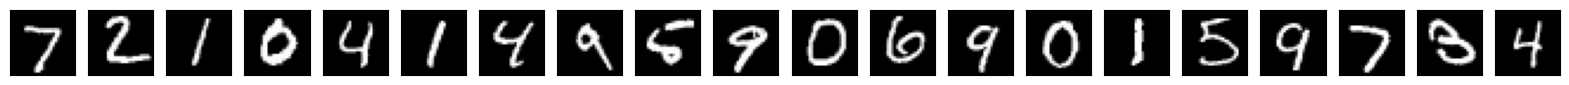

In [3]:
import matplotlib.pyplot as plt
n = 20
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()

In [4]:
print("Previous x_train shape: {} \nPrevious y_train shape:{}".format(x_train.shape, y_train.shape))
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
classes = 10
y_train = np_utils.to_categorical(y_train, classes)
y_test = np_utils.to_categorical(y_test, classes)
print("New x_train shape: {} \nNew y_train shape:{}".format(x_train.shape, y_train.shape))

Previous x_train shape: (60000, 28, 28) 
Previous y_train shape:(60000,)
New x_train shape: (60000, 784) 
New y_train shape:(60000, 10)


In [5]:
input_size = 784
batch_size = 200
hidden1 = 400
hidden2 = 20
epochs = 2

**Building the Model**

In [6]:
model = Sequential()
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))

model.add(Dense(hidden2, activation='relu'))
model.add(Dense(classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
metrics=['accuracy'], optimizer='sgd')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 400)               314000    
                                                                 
 dense_1 (Dense)             (None, 20)                8020      
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
Total params: 322,230
Trainable params: 322,230
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=20, verbose=2)

Epoch 1/20
300/300 - 5s - loss: 0.2905 - accuracy: 0.9193 - 5s/epoch - 18ms/step
Epoch 2/20
300/300 - 3s - loss: 0.2774 - accuracy: 0.9224 - 3s/epoch - 12ms/step
Epoch 3/20
300/300 - 3s - loss: 0.2664 - accuracy: 0.9258 - 3s/epoch - 8ms/step
Epoch 4/20
300/300 - 3s - loss: 0.2563 - accuracy: 0.9284 - 3s/epoch - 8ms/step
Epoch 5/20
300/300 - 3s - loss: 0.2472 - accuracy: 0.9313 - 3s/epoch - 9ms/step
Epoch 6/20
300/300 - 4s - loss: 0.2386 - accuracy: 0.9336 - 4s/epoch - 13ms/step
Epoch 7/20
300/300 - 3s - loss: 0.2310 - accuracy: 0.9360 - 3s/epoch - 9ms/step
Epoch 8/20
300/300 - 3s - loss: 0.2236 - accuracy: 0.9376 - 3s/epoch - 9ms/step
Epoch 9/20
300/300 - 3s - loss: 0.2170 - accuracy: 0.9397 - 3s/epoch - 9ms/step
Epoch 10/20
300/300 - 4s - loss: 0.2106 - accuracy: 0.9413 - 4s/epoch - 12ms/step
Epoch 11/20
300/300 - 3s - loss: 0.2046 - accuracy: 0.9429 - 3s/epoch - 9ms/step
Epoch 12/20
300/300 - 3s - loss: 0.1987 - accuracy: 0.9446 - 3s/epoch - 9ms/step
Epoch 13/20
300/300 - 3s - loss: 

313/313 [==============================] - 2s 5ms/step - loss: 0.1637 - accuracy: 0.9534

Test accuracy: 0.9534000158309937
1/1 [==============================] - 0s 42ms/step
[7 2 1 0 4 1 4 9 6 9 0 6 9 0 1 5 9 7 3 4]


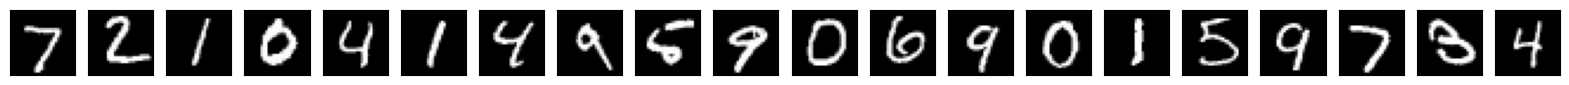

In [18]:
score = model.evaluate(x_test, y_test, verbose=1)
print('\n''Test accuracy:', score[1])
mask = range(0,20)
x_valid = x_test[mask]
predict_y=model.predict(x_valid)
classes_y=np.argmax(predict_y,axis=1)
print(classes_y)

plt.figure(figsize=(20, 6))
for i in range(n):
    ax = plt.subplot(2, n, i+1 )
    plt.imshow(x_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
plt.close()